# 99 % on MNIST

In this example i try to get 99% Accuracy on the Testset of the MNIST-Dataset.

## Imports

In [1]:
from main import Model                # the main class
from optimizer import Adam            # the optimizer i will use for training
import numpy as np
import tensorflow.keras as keras      # just for downloading the dataset
from plots import *                   # some functions for plotting
from helperfunctions import one_hot   # hot-encodes values

# noise images 
from helperfunctions import add_noise, shot_noise, impulse_noise, motion_noise

## Download and prepairing the data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path='mnist.npz')

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(len(x_train), 1, 28, 28)
x_test = x_test.reshape(len(x_test), 1, 28, 28)

train_labels = y_train.copy()
test_labels = y_test.copy()

y_train = one_hot(y_train)
y_test = one_hot(y_test)

## Build the model

In [3]:
nn = Model(model_name='NineNine2')

In [4]:
architecture = [
        {"layer_type": "GaussianNoise", 'input_shape': (1, 28, 28), 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},
        {"layer_type": "Flatten"},

        {"layer_type": "Dense", "neurons": 256, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},
    
        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},


        {"layer_type": "Dense", "neurons": 64, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense",  "neurons": 64, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        # {"layer_type": "GaussianNoise", 'standard_diviation': .1},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 10}
    ]

In [5]:
optimizer = Adam(lr=.1)

In [6]:
nn.compile(architecture, loss='categorical_crossentropy', optimizer=optimizer)

In [7]:
nn.summary()

NineNine2 summary:
layer-type                input_shape    output_shape    neurons    trainable-params    activation-function
------------------------  -------------  --------------  ---------  ------------------  ---------------------
GaussianNoise             (1, 28, 28)    (1, 28, 28)     0          0                   -
Dropout                   (1, 28, 28)    (1, 28, 28)     0          0                   -
Flatten                   (1, 28, 28)    (784,)          0          0                   -
Dense                     (784,)         256             256        200960              -
BatchNormalization        256            256             0          512                 -
Activation                256            256             0          0                   relu
Dropout                   256            256             0          0                   -
Dense                     256            128             128        32896               -
BatchNormalization        128           

## Training

start training [epochs: 40, batchsize: 128-512, shuffle: True, policy: loss]
epoch 1 / 40: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of 469 batches trained (0h 1min 5sec)) 
epoch 1: loss: 2.3245850484903823 acc: 0.8807166666666667
 
epoch 2 / 40: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of 469 batches trained (0h 1min 6sec)) 
epoch 2: loss: 1.2293390181016037 acc: 0.94485
 
epoch 3 / 40: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of 469 batches trained (0h 1min 7sec)) 
epoch 3: loss: 0.8345680710676368 acc: 0.9543833333333334
 
epoch 4 / 40: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of 469 batches trained (0h 1min 6sec)) 
epoch 4: loss: 0.8117903865888716 acc: 0.9518333333333333
 
epoch 5 / 40: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of 469 batches trained (0h 1min 6sec)) 
epoch 5: loss: 0.8585704083613992 acc: 0.96505
 
snapshot loaded!
epoch 6 / 40: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of

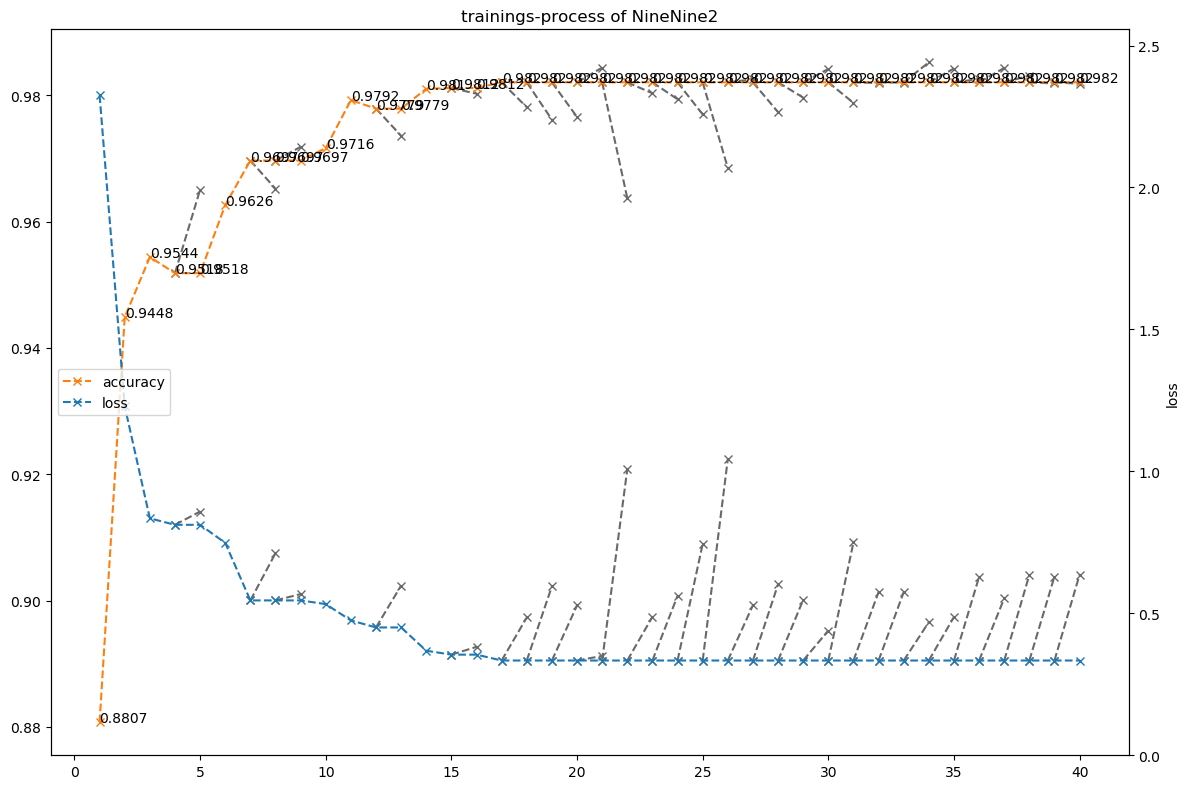

In [8]:
batch_sizes = []
# batch_sizes.extend([64] * 5)
batch_sizes.extend([128] * 10)
batch_sizes.extend([256] * 20)
batch_sizes.extend([512] * 10)
loss, acc = nn.train(x_train, y_train, batchsize=batch_sizes, epochs=40, shuffle=True, policy='loss')
nn.save()

In [9]:
nn.evaluate(x_test, y_test)

(3.961731604102267, 0.9318)

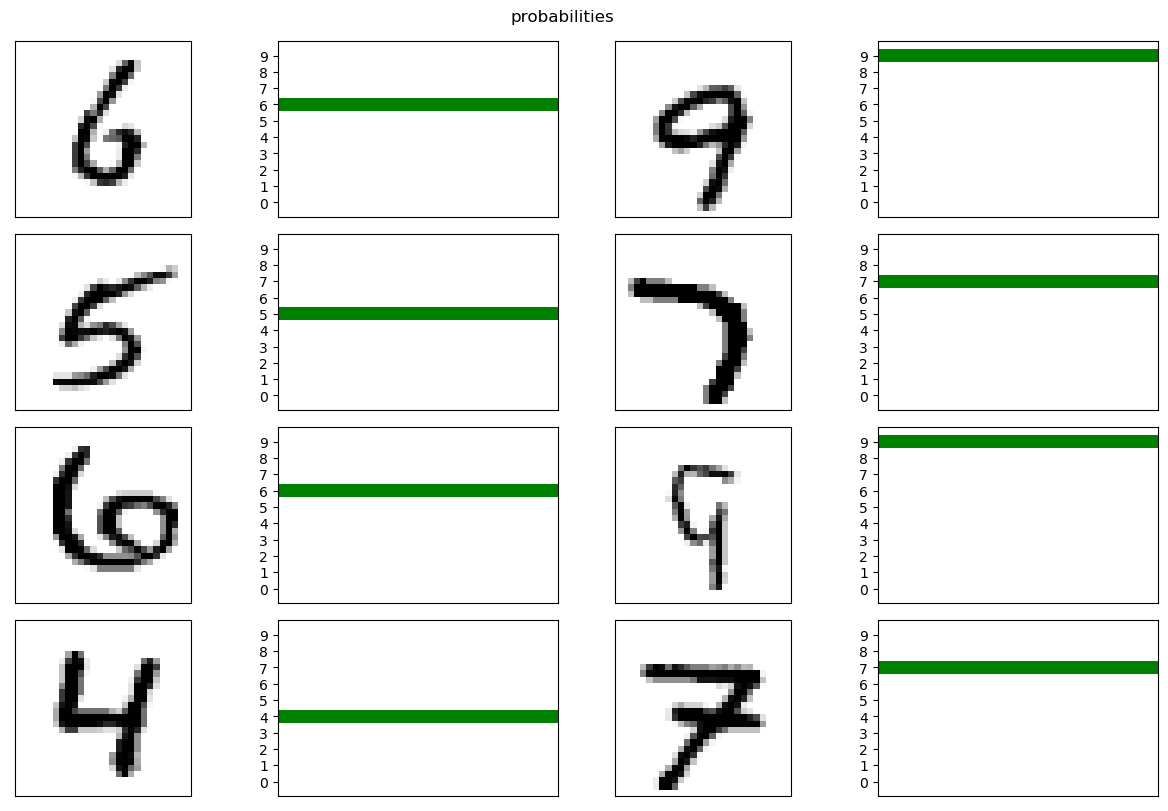

In [10]:
pred, prob = nn.predict(x_test, return_probability=True)

nr=50
showImagesWithProbabilities(x_test[nr:nr+16], prob[nr:nr+16], test_labels[nr:nr+16])